### Import The Main Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn  as sns
import joblib,missingno
#sklearn
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PolynomialFeatures
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.linear_model import LinearRegression ,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import joblib


In [2]:
df=pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
#check nulls
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

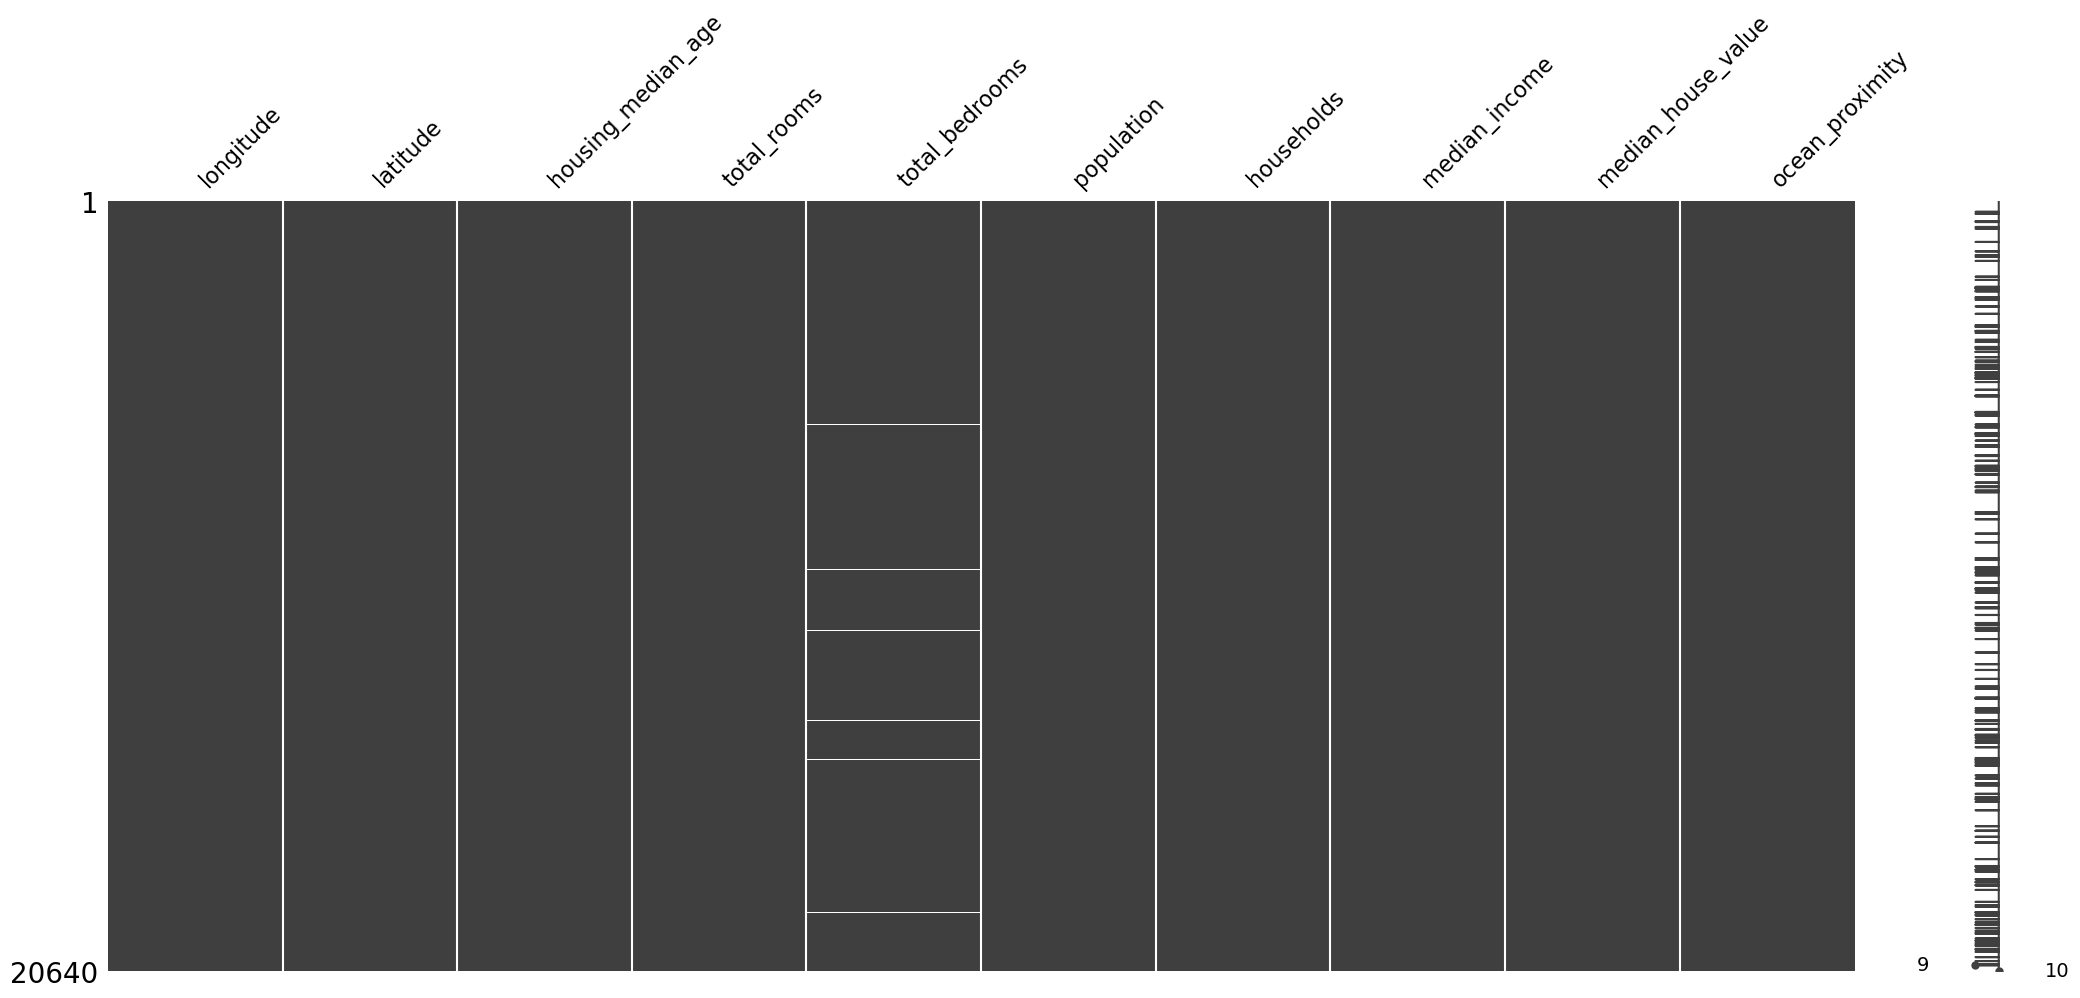

In [6]:
#check nulls using missingno 
missingno.matrix(df)

* `comment` : The Data Set eigth numrical features and all of the has the data type float64 except one column called ocean_proximity is a object column and all the column dosen't has any nulls values except the total_bedrooms column has 207 null value

### Exploratory Data Analysis (EDA)

`Univariate Visualization`

In [7]:
ocean_values=df['ocean_proximity'].unique()
replicates= df['ocean_proximity'].value_counts()


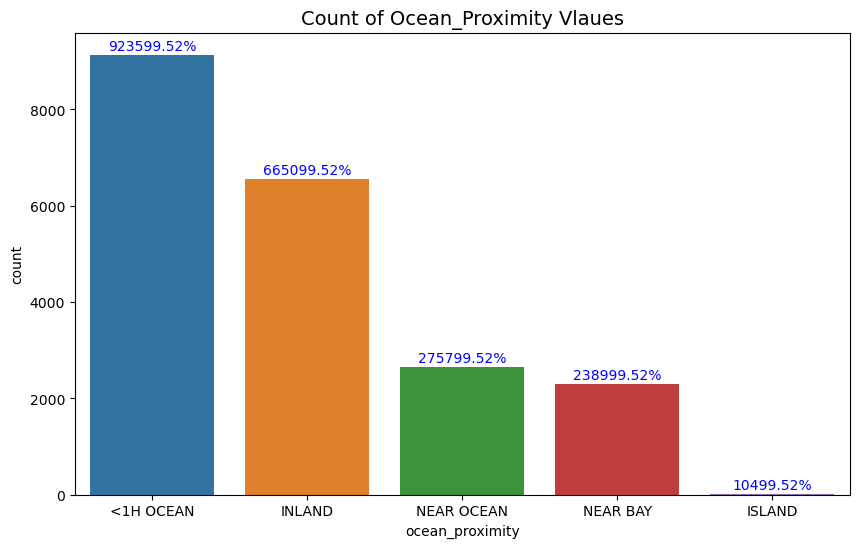

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='ocean_proximity',data=df,order=df['ocean_proximity'].value_counts().index)
plt.title("Count of Ocean_Proximity Vlaues",fontsize=14,c='k')
for i in  range(len(replicates)):
    height= replicates.values[i]+100
    text=f"{(height-100/len(df))*100 :.2f}%"
    plt.text(x=i,y=height,s=text,ha="center",c="b")

* `Comment`: Most Of The Houses in The Data set is Belong to the (<1H OCEAN>) Category


In [9]:
# Replace the value (<1H OCEAN) with (1H OCEAN) -- will cause an error in Deployment
df['ocean_proximity'][df['ocean_proximity']=="<1H OCEAN"]="1H OCEAN"
df['ocean_proximity'].unique()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3692\2270981405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ocean_proximity'][df['ocean_proximity']=="<1H OCEAN"]="1H OCEAN"


array(['NEAR BAY', '1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

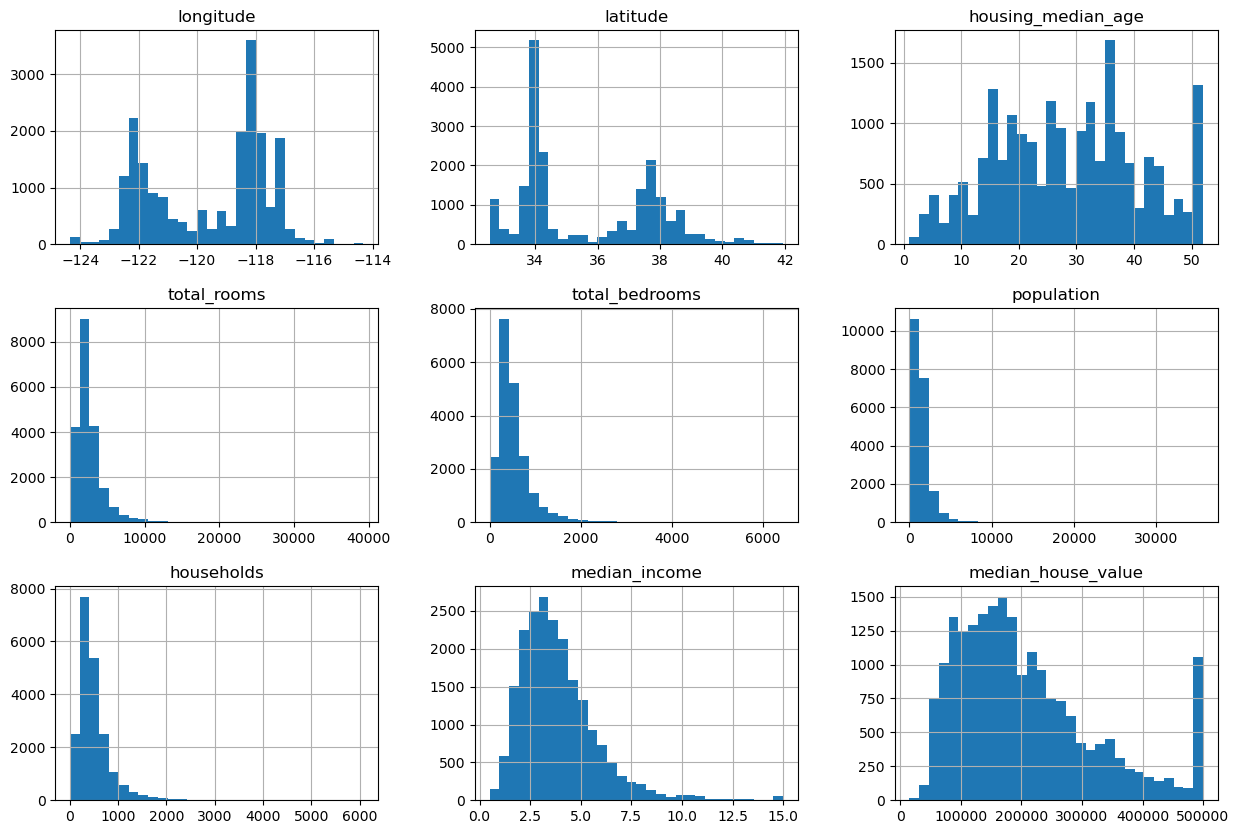

In [10]:
df.hist(bins=30,figsize=(15,10));

* `Comment` :Most of the numerical features are skewed, which is not the optimal distribution of the data. The optimal distribution is the normal distribution, so we will handle this problem.

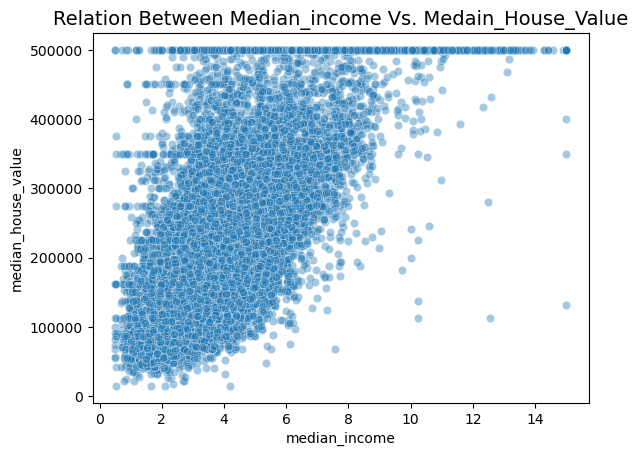

In [11]:
plt.title("Relation Between Median_income Vs. Medain_House_Value",fontsize=14)
sns.scatterplot(x=df['median_income'],y=df['median_house_value'],alpha=.4)
plt.show()

* `Comment` : I Think There Is Very High Correlation between the Median Income and Median_House_Value (Target) 

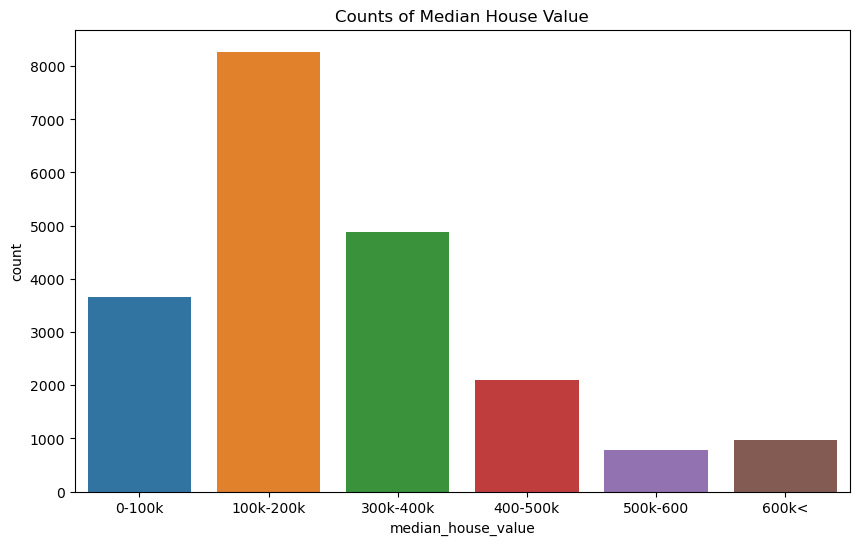

In [12]:
house_value_bins=pd.cut(x=df['median_house_value'],bins=[-np.inf,100000,200000,300000,400000,500000,np.inf],
labels=["0-100k","100k-200k","300k-400k","400-500k","500k-600","600k<"])
plt.figure(figsize=(10,6))
plt.title("Counts of Median House Value")
sns.countplot(x=house_value_bins)
plt.show()

* `Comment` : The Majority of the House Values Is Between 100k-200k

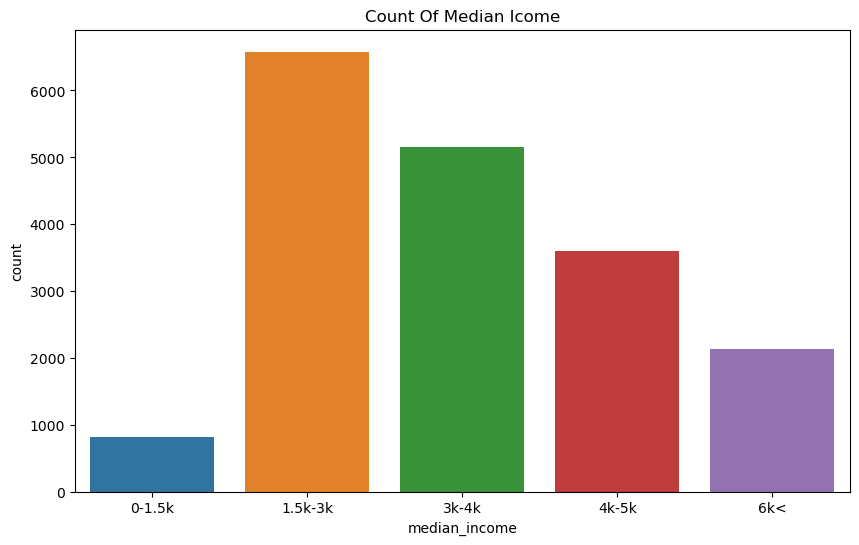

In [13]:
median_income_bins=pd.cut(x=df['median_income'],bins=[-np.inf,1.5,3,4,5,6],
                          labels=['0-1.5k','1.5k-3k','3k-4k','4k-5k','6k<'])
plt.figure(figsize=(10,6))
plt.title("Count Of Median Icome")
sns.countplot(x=median_income_bins)
plt.show()

* `Comment` :Most Of The median Income Value Is Between 1.5k-3k

`Bivariate Visualization`

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

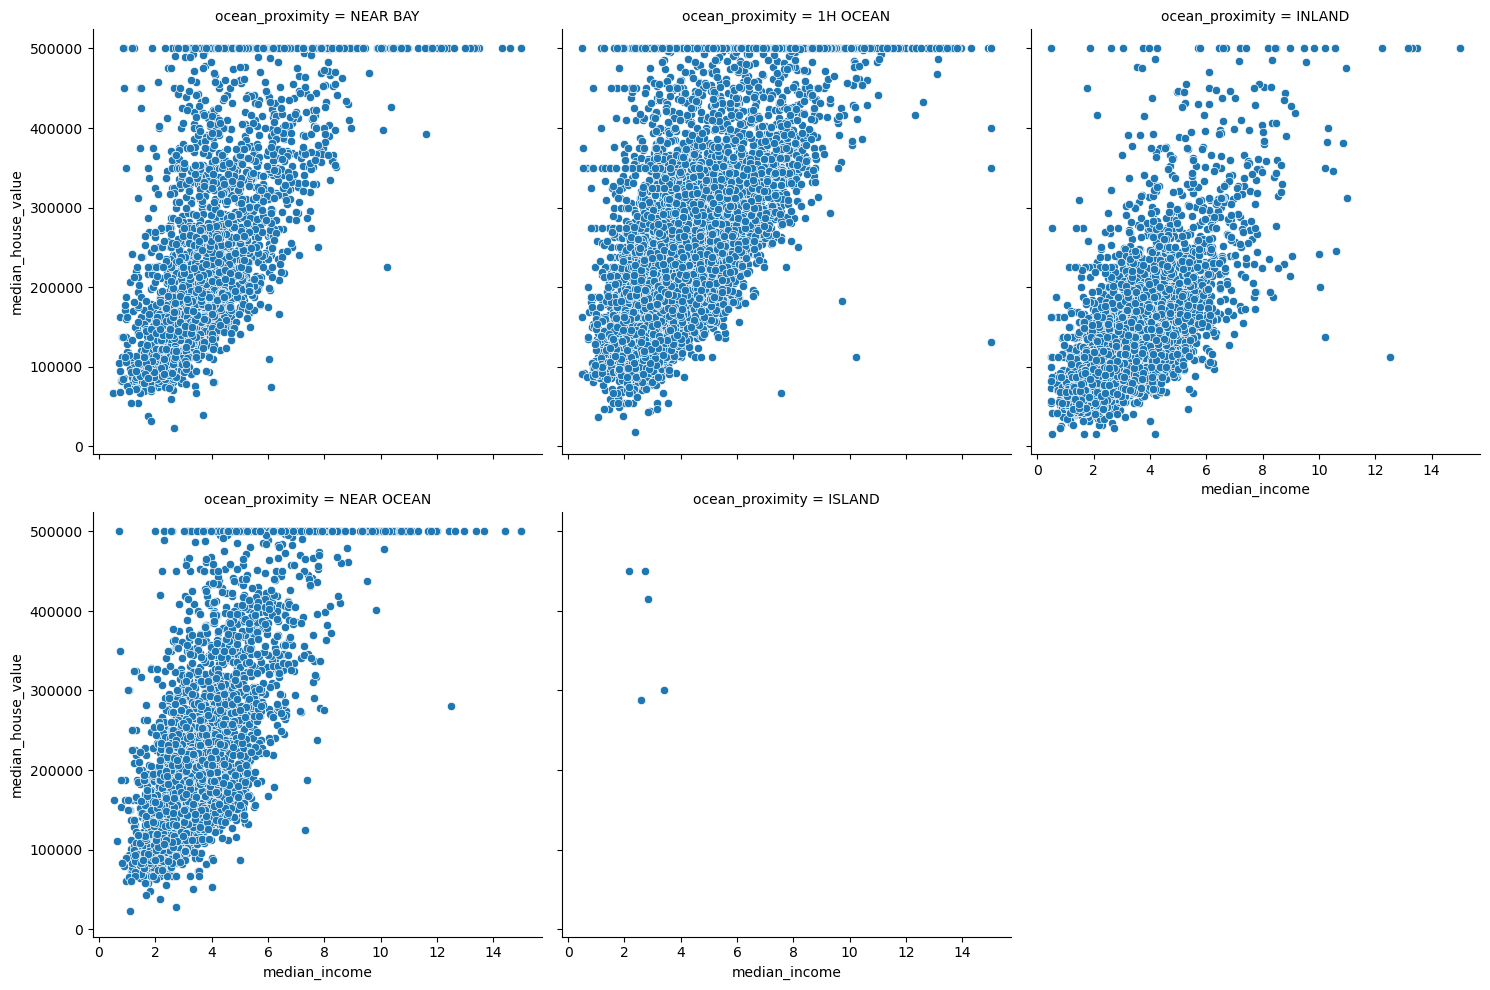

In [14]:
plt.figure(figsize=(10,6))
sns.relplot(x=df['median_income'],y=df['median_house_value'],data=df,col='ocean_proximity',kind="scatter",col_wrap=3)
plt.show()

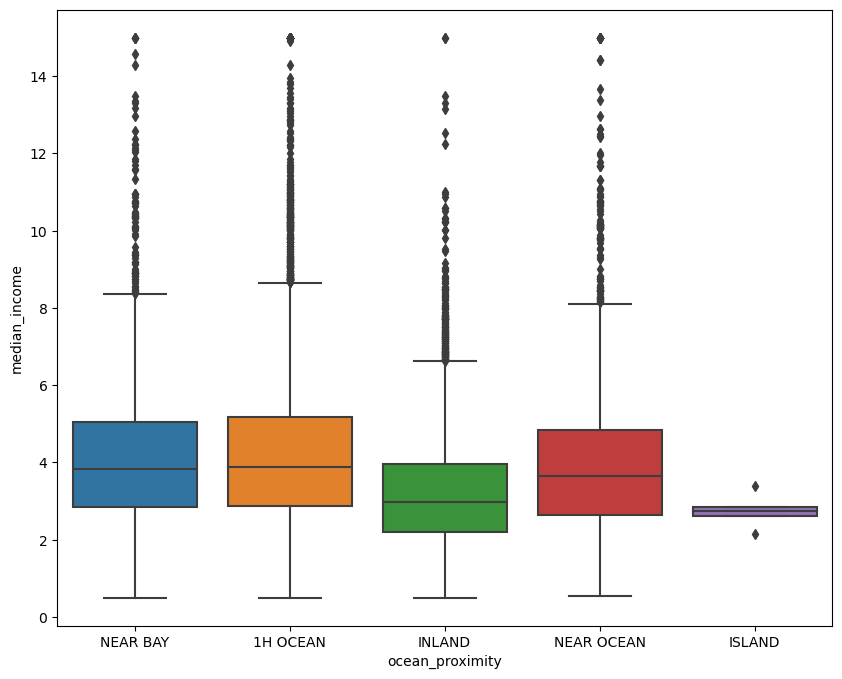

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(y='median_income',data=df,x="ocean_proximity")
plt.show()

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

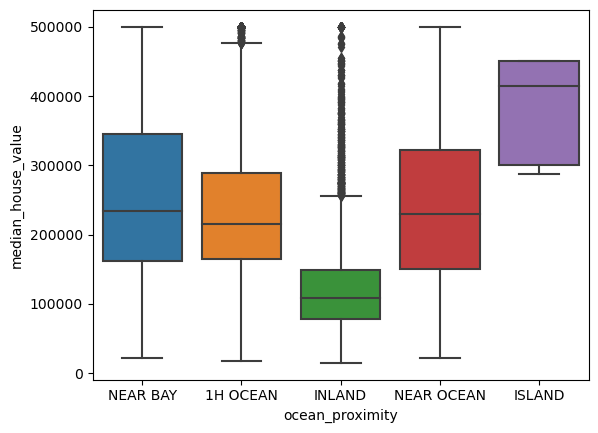

In [16]:
sns.boxplot(x="ocean_proximity",data=df,y="median_house_value")

`Multivariate Visulization`

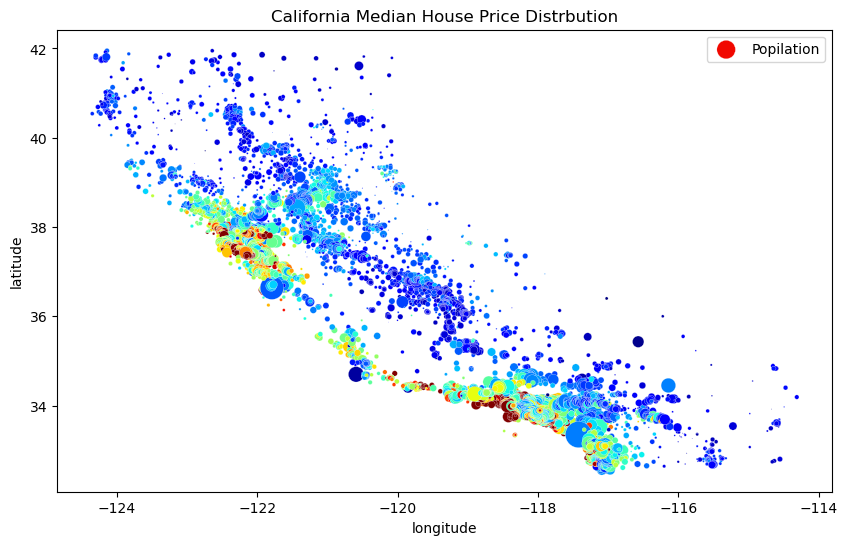

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['longitude'],y=df['latitude'],cmap=plt.get_cmap("jet"),s=df['population']/100,c=df['median_house_value']
                ,label="Popilation")
plt.title("California Median House Price Distrbution")
plt.legend()
plt.show()

`Check The Correlation Between The Features And The Target`

In [18]:
df.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: >

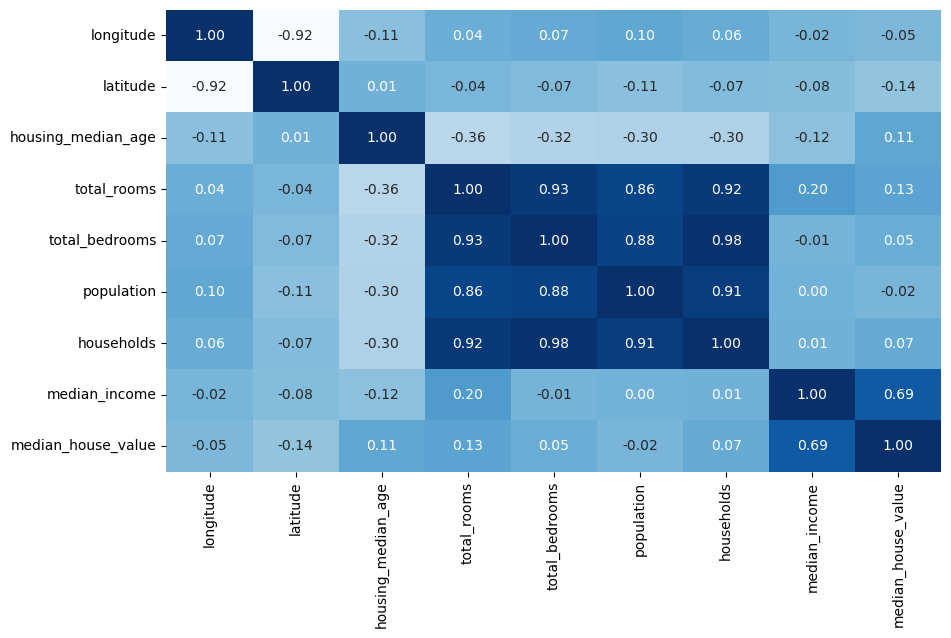

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="Blues",fmt=".2f",cbar=False)

`Feature Engeneering`

In [20]:
df['rooms_per_household' ] = df['total_rooms' ] / df['households' ]
df['bedroms_per_rooms' ] = df['total_bedrooms' ] / df['total_rooms']
df['population_per_household' ] = df['population' ] / df['households']

In [21]:
df.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

`Split The Data`

In [22]:
x=df.drop(columns=["median_house_value"])
y=df['median_house_value']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,shuffle=True,random_state=42)

`Dealing with Nulls  & Scaling Features` 

In [24]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedroms_per_rooms,population_per_household
4602,-118.27,34.05,12.0,535.0,328.0,1194.0,365.0,1.2012,1H OCEAN,1.465753,0.613084,3.271233
6978,-118.03,33.97,32.0,2468.0,552.0,1190.0,479.0,3.8275,1H OCEAN,5.152401,0.223663,2.484342
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,INLAND,5.000000,0.200000,2.752688
2549,-124.17,40.79,43.0,2285.0,479.0,1169.0,482.0,1.9688,NEAR OCEAN,4.740664,0.209628,2.425311
11025,-117.82,33.79,26.0,2641.0,633.0,3657.0,617.0,4.1339,1H OCEAN,4.280389,0.239682,5.927066
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,1H OCEAN,6.129032,0.151128,3.032258
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND,6.868597,0.184825,3.904232
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,1H OCEAN,3.986717,0.270823,3.332068
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,1H OCEAN,6.395349,0.166993,3.178891


In [25]:
num_col =x_train.select_dtypes('number').columns
cat_col = x_train.select_dtypes("object").columns

<Axes: >

<Figure size 1000x600 with 0 Axes>

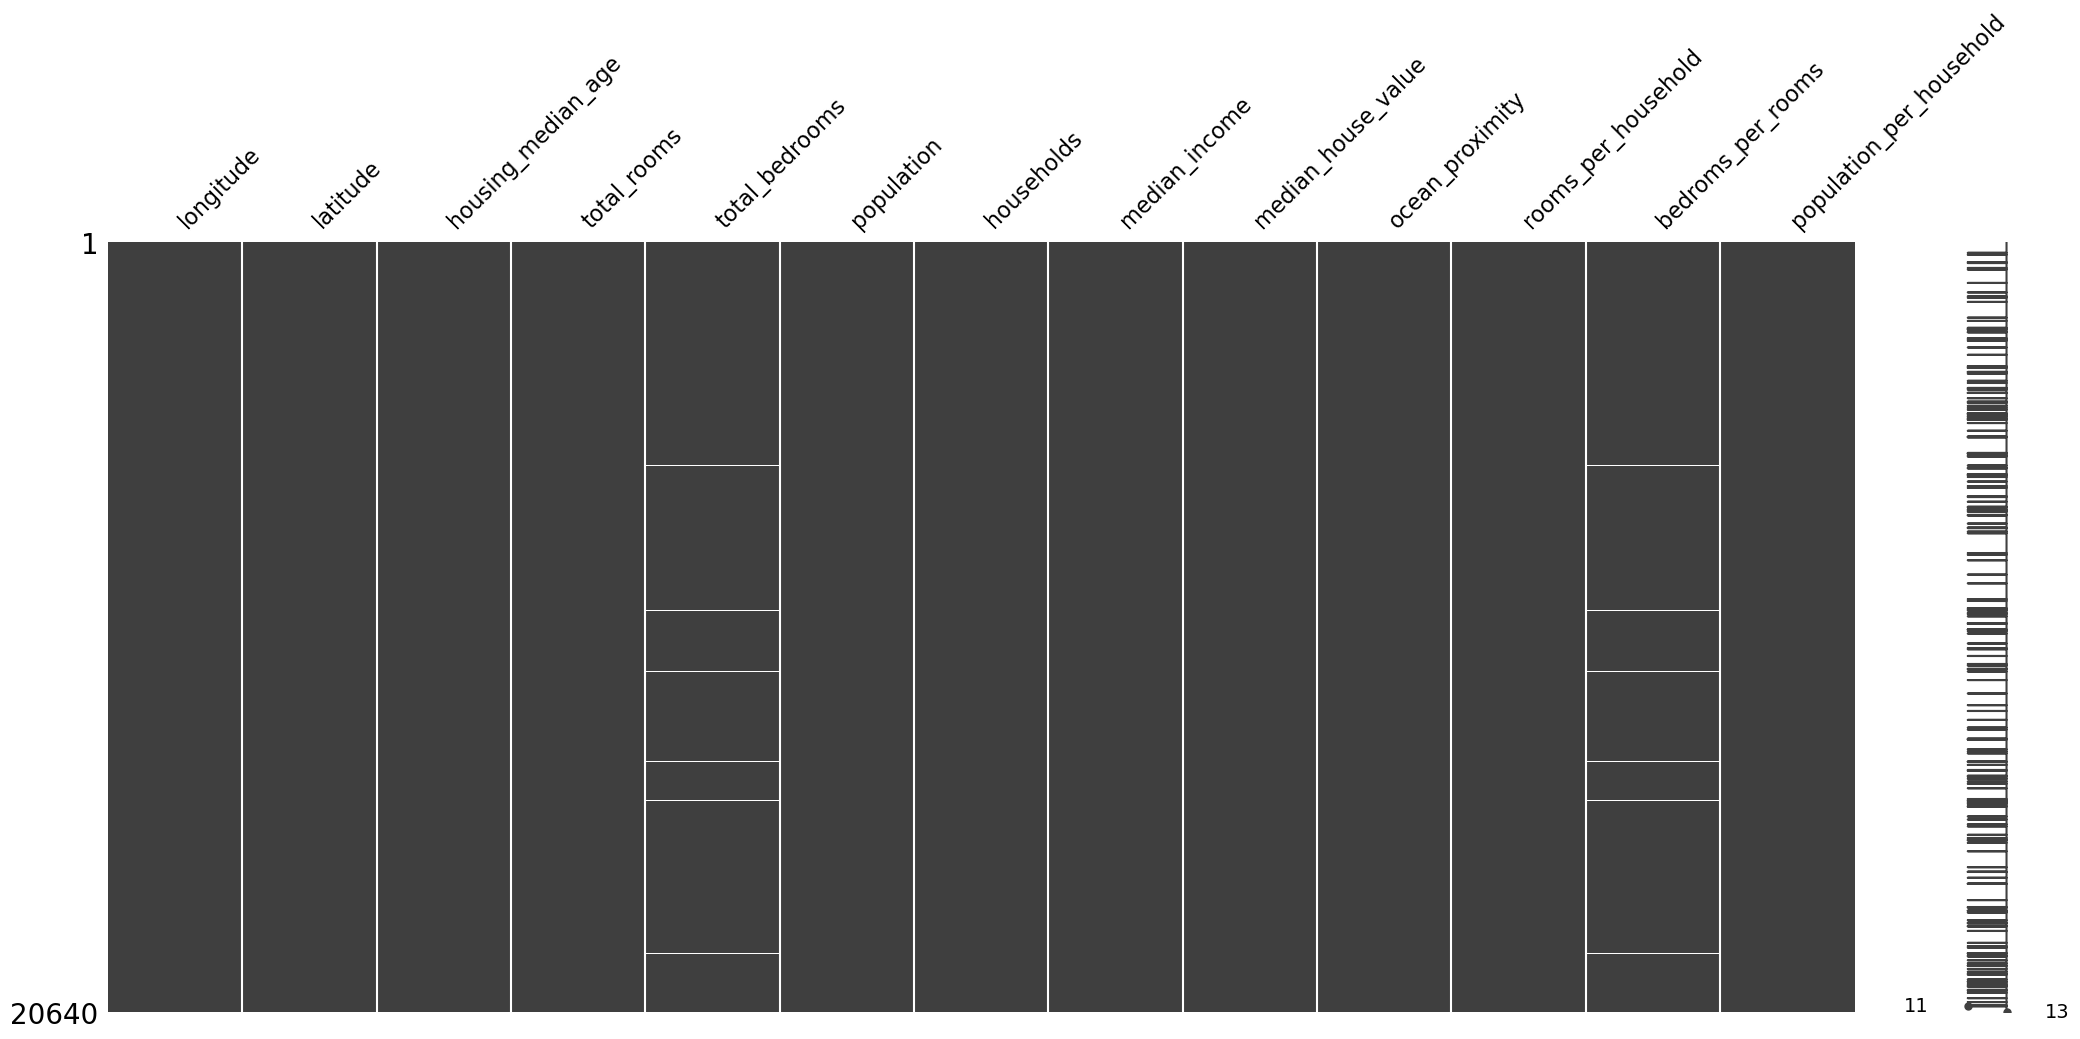

In [26]:
plt.figure(figsize=(10,6))
missingno.matrix(df)

In [27]:
num_pip= Pipeline(steps=[("selector",DataFrameSelector(num_col)),
    ("imputer",SimpleImputer(strategy="median")),
                        ("scaler",StandardScaler()) ])


`Encoding Features`

In [28]:
cat_pip=Pipeline(steps=[("selector",DataFrameSelector(cat_col)),
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("ohe",OneHotEncoder(sparse_output=False))])


`But All Together`

In [29]:
main_pip=FeatureUnion(transformer_list=[
    ("num",num_pip),
    ("cat",cat_pip)]
)
x_train_finall= main_pip.fit_transform(x_train)
x_test_finall=main_pip.transform(x_test)

### ML Buliding

`Linear Regression`

In [30]:
lin_reg=LinearRegression()
lin_reg.fit(x_train_finall,y_train)

LinearRegression()

In [31]:
mse_score_lin=cross_val_score(estimator=lin_reg,X=x_train_finall,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
rmse_score=np.sqrt(-1*mse_score_lin)
rmse_score.mean()

67880.14257788868

`SGDRegressor`

In [32]:
sgd_reg=SGDRegressor(penalty='l2',alpha=0.0001,shuffle=True,max_iter=10000,eta0=0.001)
sgd_reg.fit(x_train_finall,y_train)

SGDRegressor(eta0=0.001, max_iter=10000)

In [33]:
mse_score_Sgd=cross_val_score(estimator=sgd_reg,X=x_train_finall,y=y_train,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
rmse_score_sgdg=np.sqrt(-1*mse_score_Sgd)
rmse_score_sgdg.mean()

67991.94818930372

`Ridge`

In [34]:
ridge_reg=Ridge(alpha=0.9,solver='auto')
ridge_reg.fit(x_train_finall,y_train)

Ridge(alpha=0.9)

In [35]:
mse_Score_rid=cross_val_score(estimator=ridge_reg,cv=5,X=x_train_finall,y=y_train,scoring='neg_mean_squared_error')
rmse_rid=np.sqrt(mse_Score_rid*-1).mean()
rmse_rid

67880.21922984191

`Lasso`

In [36]:
lasso=Lasso(alpha=1,max_iter=100000)
lasso.fit(x_train_finall,y_train)

Lasso(alpha=1, max_iter=100000)

In [37]:
lasso.coef_

array([-56166.28650229, -56466.30701119,  13864.90232431,   6112.77503543,
         8937.16731622, -46626.84295639,  36609.7003318 ,  79167.88726091,
         6350.89510096,  16578.08308073,    700.82893968,      0.        ,
       -34479.90501045, 143036.55857524,  -5501.79735044,   3698.19799083])

In [38]:
mse_Score_lasso=cross_val_score(estimator=lasso,cv=5,X=x_train_finall,y=y_train,scoring='neg_mean_squared_error')
rmse_lasso=np.sqrt(mse_Score_lasso*-1).mean()
rmse_lasso

67879.9723018768

`ElasticNet`

In [39]:
el_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
el_net.fit(x_train_finall,y_train)

ElasticNet(alpha=0.1)

In [40]:
mse_Score_el_net=cross_val_score(estimator=el_net,cv=5,X=x_train_finall,y=y_train,scoring='neg_mean_squared_error')
rmse_net=np.sqrt(mse_Score_el_net*-1).mean()
rmse_net

68581.26101196748

`PloyNomialRegression`

In [41]:
poly_fit=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly_fit.fit_transform(x_train_finall)


In [42]:
lin_reg_poly=LinearRegression()
lin_reg_poly.fit(x_poly,y_train)

LinearRegression()

`KnnRegression`

In [43]:
knn=KNeighborsRegressor(n_neighbors=6,weights="uniform")
knn.fit(x_train_finall,y_train)

KNeighborsRegressor(n_neighbors=6)

In [44]:
mse_Score_knn=cross_val_score(estimator=knn,cv=5,X=x_train_finall,y=y_train,scoring='neg_mean_squared_error')
rmse_knn=np.sqrt(mse_Score_knn*-1).mean()
rmse_knn

61282.180365177745

`RandomForest`

In [46]:
mse_Score_ref=cross_val_score(estimator=ref,cv=5,X=x_train_finall,y=y_train,scoring='neg_mean_squared_error')
rmse_ref=np.sqrt(mse_Score_ref*-1).mean()
rmse_ref

59969.67796450624

In [47]:
best_Ref=RandomForestRegressor(n_estimators=400,max_depth=18,max_samples=0.9,random_state=42)
best_Ref.fit(x_train_finall,y_train)

RandomForestRegressor(max_depth=18, max_samples=0.9, n_estimators=400,
                      random_state=42)

In [57]:
mse_Score_ref=cross_val_score(estimator=best_Ref,cv=5,X=x_train_finall,y=y_train,scoring='neg_mean_squared_error')
rmse_ref=np.sqrt(mse_Score_ref*-1).mean()
rmse_ref

50233.050012339765

In [49]:
xgb=XGBRegressor(learning_rate=0.1,max_depth=8,n_estimators=150,subsample=0.8)
xgb.fit(x_train_finall,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
joblib.dump(xgb,'model_XGBoost.pkl')

['model_XGBoost.pkl']

In [53]:
model=joblib.load('model_XGBoost.pkl')

In [54]:
y_test_pred=model.predict(x_test_finall)

In [56]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

44880.94808999626